In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import datetime

In [8]:
df=pd.read_csv('ecommerce.csv',encoding='ISO-8859-1')

In [11]:
df.columns



Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.rename(index=str,columns={'InvoiceNo':'invoice_num',
                              'StockCode':'stock_code',
                             'Description':'description',
                             'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'},inplace=True
                             
                            
                            
                            
                            )

In [14]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
cust_id         406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [16]:
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [20]:
df['invoice_date']=pd.to_datetime(df.invoice_date,format= '%m/%d/%Y %H:%M')

In [21]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df_new=df.dropna()

In [23]:
df_new.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null float64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [28]:
df_new.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

In [30]:
df_new['cust_id']=df_new['cust_id'].astype('int64')

In [31]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null int64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [36]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [37]:
df_new=df_new[df_new.quantity>0]

In [38]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [39]:
df_new['amount_spent']=df_new['quantity']*df_new['unit_price']

In [40]:
df_new=df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

In [41]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [42]:
df_new.insert(loc=2,column='year_month',value=df_new['invoice_date'].map(lambda x:100*x.year+x.month))

In [43]:
df_new.insert(loc=3,column='month',value=df_new.invoice_date.dt.month)

In [44]:
df_new.insert(loc=4,column='day',value=(df_new.invoice_date.dt.dayofweek)+1)

In [45]:
df_new.insert(loc=5,column='hour',value=df_new.invoice_date.dt.hour)

In [46]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


# EXploratory analysis

In [47]:
#how many orders made by customers 

In [57]:
df_new.groupby(by=['cust_id','country'],as_index=False)['invoice_num'].count().head().sort_values(by='invoice_num',ascending=False)

,cust_id,country,invoice_num
1,12347,Iceland,182
3,12349,Italy,73
2,12348,Finland,31
4,12350,Norway,17
0,12346,United Kingdom,1


In [62]:
orders=df_new.groupby(by=['cust_id','country'],as_index=False)['invoice_num'].count()

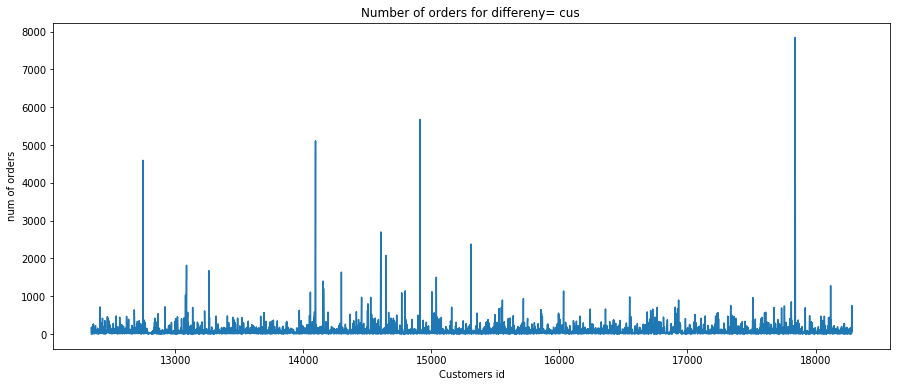

In [63]:
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id,orders.invoice_num)
plt.xlabel('Customers id')
plt.ylabel('num of orders')
plt.title("Number of orders for differeny= cus ")
plt.show()

In [65]:
#how much money spent by customres 

In [74]:
money_spent=df_new.groupby(by=['cust_id','country'],as_index=False)['amount_spent'].sum()

In [75]:
money_spent.head()

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


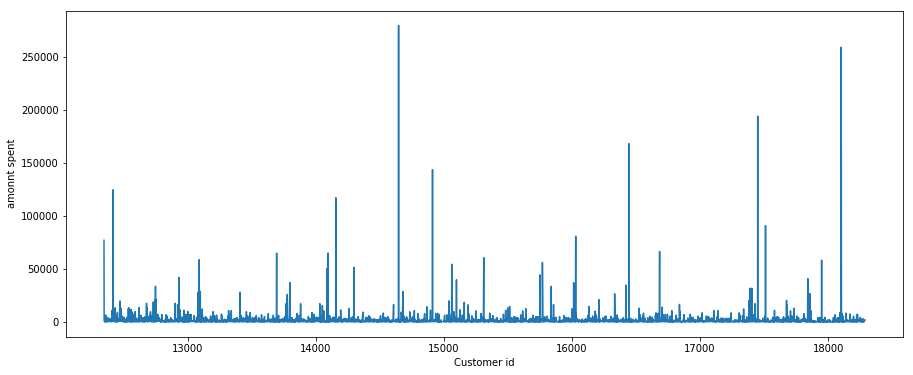

In [76]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id,money_spent.amount_spent)
plt.xlabel('Customer id')
plt.ylabel('amonnt spent')
plt.show()

In [78]:
money_spent.sort_values(by='amount_spent',ascending=False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [85]:
#orders per month

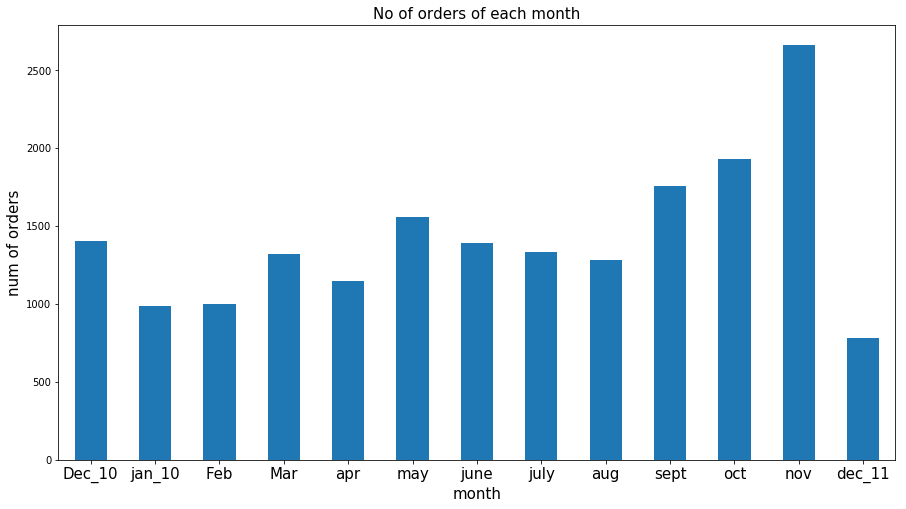

In [92]:
ax=df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,8))
ax.set_xlabel('month',fontsize=15)
ax.set_ylabel('num of orders',fontsize=15)
ax.set_title('No of orders of each month',fontsize=15)
ax.set_xticklabels(('Dec_10','jan_10','Feb','Mar','apr','may','june','july','aug','sept','oct','nov','dec_11'), rotation='horizontal',fontsize=15)
plt.show()

In [93]:
#orders per day

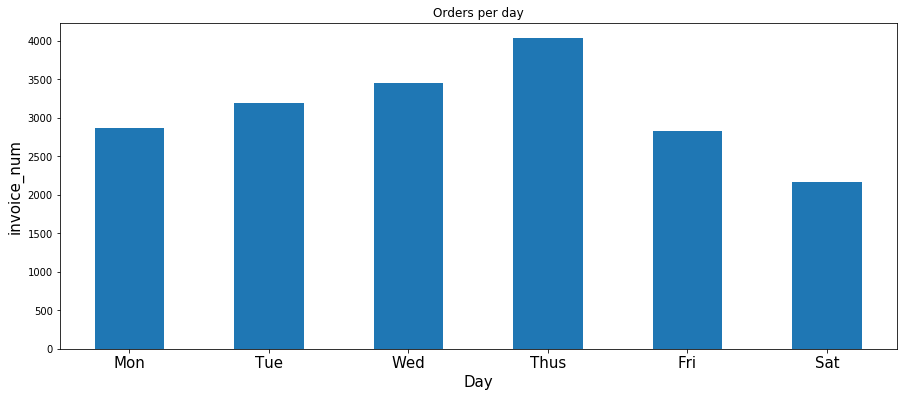

In [91]:
ax1=df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax1.set_xlabel('Day',fontsize=15)
ax1.set_ylabel('invoice_num',fontsize=15)
ax1.set_title('Orders per day')
ax1.set_xticklabels(('Mon','Tue','Wed','Thus','Fri','Sat','Sun'),rotation='horizontal',fontsize=15)
plt.show()

In [98]:
ax2=df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()
ax2

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

[]

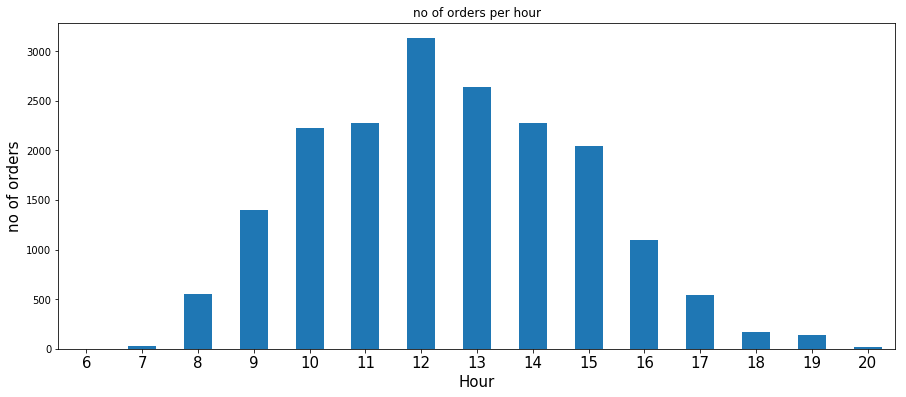

In [96]:
ax2=df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax2.set_xlabel('Hour',fontsize=15)
ax2.set_ylabel('no of orders',fontsize=15)
ax2.set_title('no of orders per hour')
ax2.set_xticklabels(range(6,21),rotation='horizontal',fontsize=15)
plt.plot()

In [99]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

In [105]:
 #Free ietms given in which month

In [100]:
df_free=df_new[df_new.unit_price==0]

In [101]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,REGENCY CAKESTAND 3 TIER,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,PAPER BUNTING RETROSPOT,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,PLASTERS IN TIN SKULLS,24,0.0,0.0,13081,United Kingdom


In [103]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

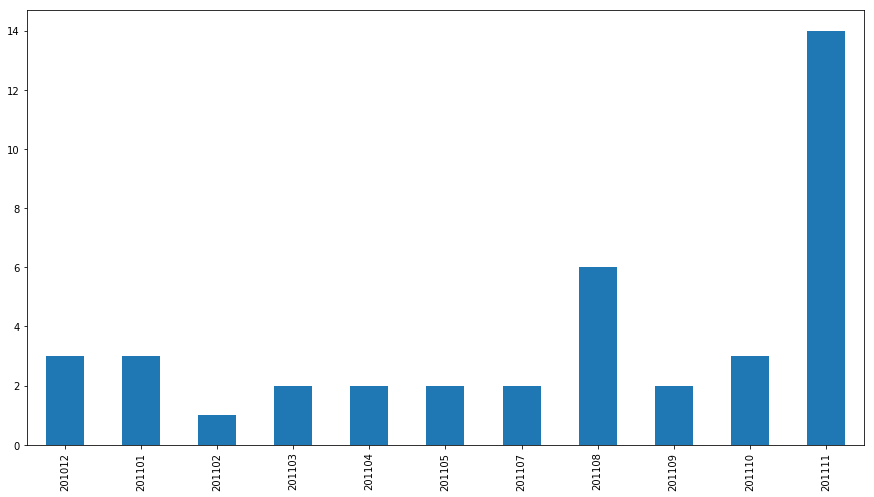

In [104]:
ax=df_free.year_month.value_counts().sort_index().plot('bar',figsize=(15,8))